# Kaggle's Digit Recognizer

Competition URL: https://www.kaggle.com/c/digit-recognizer/overview

In [1]:
# Import libraries
# Graphs
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Math
import numpy as np

# File I/O
import pandas as pd

# Models
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
## Load files
test_data = pd.read_csv('./data/test.csv')
train_data = pd.read_csv('./data/train.csv')
Y_train = train_data["label"]
X_train = train_data.drop(labels=["label"], axis=1)

## Data check
Checks if there are null or missing values

In [3]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [4]:
test_data.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

## Data plot
Checks the distribution of the labels

(array([4132., 4684., 4177., 4351., 4072., 3795., 4137., 4401., 4063.,
        4188.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

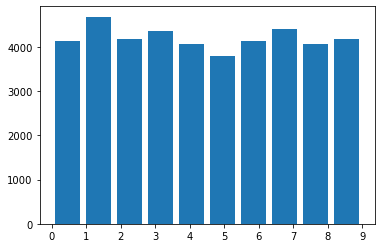

In [5]:
plt.xticks(np.arange(0, 10, 1.0))
plt.hist(Y_train, rwidth=0.8)

## ML
- Set a random seed (fixed for reproducibility)
- Split the train data (labels and data)
- Fit the model (XGBRegressor)
- Obtain the predictions and the mean absolute error

In [6]:
params = {
    "early_stopping_rounds": 15,
    "n_estimators": 1000,
    "learning_rate": 0.05,
    "random_seed": 13017,
    "test_size": 0.1
}
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=params["test_size"], random_state=params["random_seed"])
model = XGBRegressor(n_estimators=params["n_estimators"], learning_rate=params["learning_rate"])

In [7]:
model.fit(X_train, Y_train, early_stopping_rounds=params["early_stopping_rounds"], eval_set=[(X_val, Y_val)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [10]:
score = model.score(X_train, Y_train)
print(f"The score is {np.round(score * 100, 2)}%")

The score is 97.42%


In [11]:
predictions = model.predict(test_data)

In [20]:
predictions = [int(np.round(predictions[x])) for x in range(len(predictions))]
results = pd.Series(predictions, name="Label")

In [21]:
submission = pd.concat([pd.Series(range(1,28001), name = "ImageId"), results],axis = 1)

In [22]:
submission.to_csv("XGBRegressor.csv",index=False)